<a href="https://colab.research.google.com/github/Majdi21926/Tunisian_Currency_Classification/blob/main/Tunisian_Currency_Classification_MobileNet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import PIL.Image as Image
from PIL import Image, ImageOps
import os
import cv2
import pathlib

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# **IMPORT DATASET FROM DRIVE**

In this cellul, you have to put your dataset paths

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/DATA_SET/train'
valid_path = '/content/drive/My Drive/DATA_SET/test'

# **Create Model**

In [ ]:
TARGET_SIZE=224
IMG_SHAPE = (TARGET_SIZE, TARGET_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/DATA_SET/train/*')
folders
len(folders)

12

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(12, activation='softmax')
])

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# **IMAGE** **PREPROCESSING**

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/DATA_SET/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 420 images belonging to 12 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/DATA_SET/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 145 images belonging to 12 classes.


# **TRAINING**

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
14/14 [==============================] - 309s 20s/step - loss: 2.5280 - accuracy: 0.1913 - val_loss: 1.6523 - val_accuracy: 0.4138
Epoch 2/10
14/14 [==============================] - 57s 4s/step - loss: 1.4703 - accuracy: 0.4184 - val_loss: 1.2724 - val_accuracy: 0.5862
Epoch 3/10
14/14 [==============================] - 57s 4s/step - loss: 1.0641 - accuracy: 0.6461 - val_loss: 1.0890 - val_accuracy: 0.6552
Epoch 4/10
14/14 [==============================] - 57s 4s/step - loss: 0.8059 - accuracy: 0.7457 - val_loss: 0.9395 - val_accuracy: 0.7034
Epoch 5/10
14/14 [==============================] - 57s 4s/step - loss: 0.6963 - accuracy: 0.7979 - val_loss: 0.8450 - val_accuracy: 0.7586
Epoch 6/10
14/14 [==============================] - 57s 4s/step - loss: 0.5798 - accuracy: 0.8394 - val_loss: 0.7785 - val_accuracy: 0.7724
Epoch 7/10
14/14 [==============================] - 57s 4s/step - loss: 0.4801 - accuracy: 0.8948 - val_loss: 0.7268 - val_accuracy: 0.8000
Epoch 8/10
14/14 [

# **Accuracy on test dataset**

In [ ]:
import math
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(145/32))
print('Accuracy on test dataset:', test_accuracy)

5/5 [==============================] - 51s 12s/step - loss: 0.6589 - accuracy: 0.8069
Accuracy on test dataset: 0.8068965673446655


# **Visualisation**

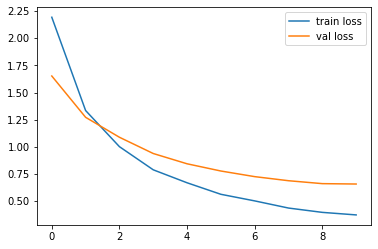

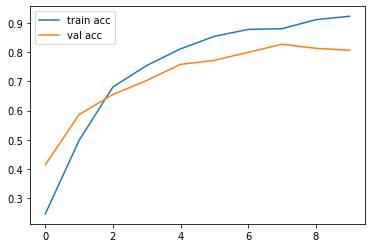

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# **Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


# **SAVING THE MODEL**

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
mobilenet_v2="model_mobilenet_v2.h5"

model.save(mobilenet_v2)

In [ ]:
!zip -r model.zip {mobilenet_v2}

  adding: model_mobilenet_v2.h5 (deflated 10%)


In [ ]:
np.set_printoptions(suppress=True)

# **Convert to tflite model**

In [ ]:
# Convert the model
converter= tf.lite.TFLiteConverter.from_keras_model(model)
mobilenetV2_tflite= converter.convert()

In [ ]:
# Save the model
with open('model_mobilenet_v2.tflite', 'wb') as f:
  f.write(mobilenetV2_tflite)

# **LOADING THE MODEL**

In [ ]:
model=keras.models.load_model('model_mobilenet_v2.h5')

# **TESTING**

In [ ]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
image = Image.open('/content/drive/MyDrive/20dt.jpg')
print(type(image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
#image = Image.open('/content/drive/My Drive/1.jpg')

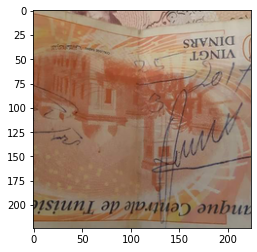

In [ ]:
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
plt.imshow(image)

In [ ]:
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

In [ ]:
data[0] = normalized_image_array

In [ ]:
prediction = model.predict(data)

In [ ]:
print(prediction)

[[1.0158379e-05 5.6039826e-03 2.7436818e-06 4.5169281e-06 1.6313596e-04
  9.8089933e-01 2.8039185e-06 3.9630700e-05 4.6628025e-05 1.2117163e-02
  1.3891493e-07 1.1097681e-03]]



***As you see the model turned 5 which it is the label of the currency 20DT

In [ ]:
#plt.imshow(image)
np.argmax(prediction)

5